<a href="https://colab.research.google.com/github/BautistaBertolami/Cap4630AI/blob/master/HW4/HW4Problem3V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Example data (original code by Pawel Wocjan, adapted to xception by Bautista Bertolami

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-04-21 00:43:27--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.4.144, 2607:f8b0:4007:80d::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.4.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   186MB/s    in 0.4s    

2020-04-21 00:43:27 (186 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Building a network with Xception

In [5]:
from keras.applications import Xception

conv_base = Xception(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(150, 150, 3))

Using TensorFlow backend.


83689472/83683744 [==============================] - 2s 0us/step


Freeze conv base

In [0]:
conv_base.trainable = False

Concatenate the base and dense layers

In [0]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               13107456  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 33,969,193
Trainable params: 13,107,713
Non-trainable params: 20,861,480
_________________________________________________________________


Train the model with frozen conv base

In [9]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# compile model

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=2e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 31s 305ms/step - loss: 0.4794 - acc: 0.7740 - val_loss: 0.8861 - val_acc: 0.9520
Epoch 2/30
100/100 [==============================] - 21s 208ms/step - loss: 0.3666 - acc: 0.8300 - val_loss: 0.0115 - val_acc: 0.9520
Epoch 3/30
100/100 [==============================] - 21s 209ms/step - loss: 0.3623 - acc: 0.8360 - val_loss: 0.5604 - val_acc: 0.9620
Epoch 4/30
100/100 [==============================] - 21s 207ms/step - loss: 0.3278 - acc: 0.8520 - val_loss: 0.0033 - val_acc: 0.9690
Epoch 5/30
100/100 [==============================] - 21s 211ms/step - loss: 0.3339 - acc: 0.8565 - val_loss: 0.0236 - val_acc: 0.9670
Epoch 6/30
100/100 [==============================] - 21s 209ms/step - loss: 0.3172 - acc: 0.8520 - val_loss: 0.0115 - val_acc: 0.9670
Epoch 7/30
100/100 [==============================] - 21s 206ms/step - loss: 0.3215 - acc: 0.8435 - val_lo

Display accuracy and loss

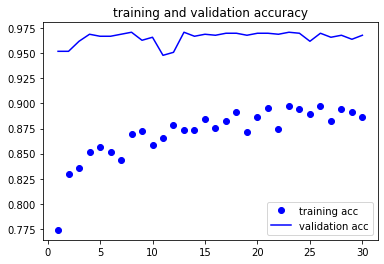

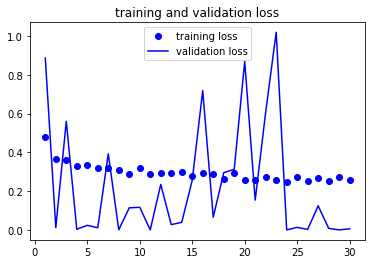

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

Fine-tuning

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block3_pool':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [12]:
# compile model

model.compile(
    loss='binary_crossentropy',
    #
    # choose a smaller learning rate
    #
    optimizer=optimizers.RMSprop(lr=1e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 37s 373ms/step - loss: 0.2436 - acc: 0.9010 - val_loss: 0.1663 - val_acc: 0.9520
Epoch 2/100
100/100 [==============================] - 28s 282ms/step - loss: 0.2021 - acc: 0.9105 - val_loss: 0.3261 - val_acc: 0.9350
Epoch 3/100
100/100 [==============================] - 28s 282ms/step - loss: 0.2122 - acc: 0.9185 - val_loss: 0.2505 - val_acc: 0.9290
Epoch 4/100
100/100 [==============================] - 28s 282ms/step - loss: 0.1798 - acc: 0.9275 - val_loss: 0.1070 - val_acc: 0.9520
Epoch 5/100
100/100 [==============================] - 28s 282ms/step - loss: 0.1811 - acc: 0.9350 - val_loss: 0.0877 - val_acc: 0.9540
Epoch 6/100
100/100 [==============================] - 28s 282ms/step - loss: 0.1760 - acc: 0.9370 - val_loss: 0.0173 - val_acc: 0.9360
Epoch 7/100
100/100 [==============================] - 28s 282ms/step - loss: 0.1565 - acc: 0.9355 - val_loss: 0.0150 - val_acc: 0.9480
Epoch 8/100
100/100 [===========================

Fine tuning curves

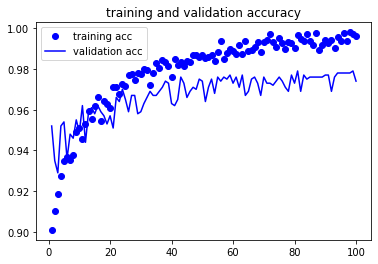

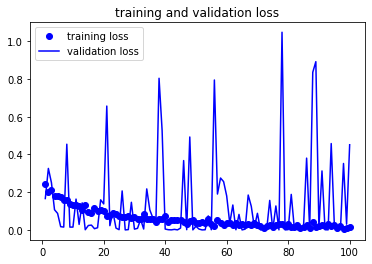

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

In [0]:
val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)

In [15]:
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

Validation loss: 0.5102710127830505
Validation accuracy: 0.9739999771118164
